In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import date
from sklearn.impute import KNNImputer
from sklearn.preprocessing import PowerTransformer
import matplotlib.patches as mpatches

# Feature Selection
from sklearn.feature_selection import RFE
import scipy.stats as stats
from scipy.stats import chi2_contingency
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
# Scaling
from sklearn.preprocessing import MinMaxScaler
# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
# Model Assessment
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LassoCV

import warnings
warnings.filterwarnings('ignore')



In [67]:
df=pd.read_csv('dataset/train.csv')

In [68]:
df[df.duplicated(keep = False)] 

,Cust_ID,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService


In [69]:
df.set_index('Cust_ID', inplace = True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15589 entries, 1 to 15589
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              15589 non-null  object 
 1   Name               15589 non-null  object 
 2   Longevity          15589 non-null  object 
 3   Year_Birth         15394 non-null  float64
 4   TypeTravel         15589 non-null  object 
 5   RoomType           15589 non-null  object 
 6   RewardPoints       15589 non-null  int64  
 7   Comfort            15589 non-null  int64  
 8   ReceptionSchedule  15589 non-null  int64  
 9   FoodDrink          15589 non-null  int64  
 10  Location           15589 non-null  int64  
 11  Wifi               15589 non-null  int64  
 12  Amenities          15589 non-null  int64  
 13  Staff              15589 non-null  int64  
 14  OnlineBooking      15589 non-null  int64  
 15  PriceQuality       15589 non-null  int64  
 16  RoomSpace          155

In [71]:
stats = df.describe()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
stats.T

,count,mean,std,min,25%,50%,75%,max,skew,kurt
Year_Birth,15394.0,1981.706444,15.179042,1936.0,1970.0,1981.0,1994.0,2014.0,-0.003847,-0.729800
RewardPoints,15589.0,5022.593816,1027.962379,409.0,4445.0,5088.0,5649.0,6950.0,-0.453779,0.260135
Comfort,15589.0,2.841619,1.388624,0.0,2.0,3.0,4.0,5.0,-0.100907,-0.935544
ReceptionSchedule,15589.0,2.997242,1.518994,0.0,2.0,3.0,4.0,5.0,-0.260705,-1.077243
FoodDrink,15589.0,2.844570,1.436948,0.0,2.0,3.0,4.0,5.0,-0.123610,-0.967047
Location,15589.0,2.986016,1.299438,1.0,2.0,3.0,4.0,5.0,-0.050229,-1.076583
Wifi,15589.0,3.245109,1.327026,0.0,2.0,3.0,4.0,6.0,-0.171255,-1.111251
Amenities,15589.0,3.374816,1.352417,0.0,2.0,4.0,4.0,5.0,-0.599498,-0.540657
Staff,15589.0,3.506383,1.319565,1.0,3.0,4.0,5.0,5.0,-0.554561,-0.858889
OnlineBooking,15589.0,3.454231,1.310343,0.0,2.0,4.0,5.0,5.0,-0.472074,-0.931811


In [72]:
df['Wifi'] = df['Wifi'].replace(6,5)

In [73]:
df_numerical = df.drop(columns=['Churn', 'Name', 'Longevity', 'TypeTravel', 'RoomType'])

imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputed_matrix = imputer.fit_transform(df_numerical)

df_cleaned = pd.DataFrame(data=imputed_matrix, columns=df_numerical.columns, index=df_numerical.index)

In [74]:
df_numerical = df[['Churn', 'Name', 'Longevity', 'TypeTravel', 'RoomType']]
df = df_numerical.join(df_cleaned)
df.head(1)

,Churn,Name,Longevity,TypeTravel,RoomType,Year_Birth,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,churn,Ms. Nicole Clarke,yes,business,single,1974.0,4907.0,3.0,4.0,1.0,...,4.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0


In [75]:
def detect_outliers_zscore(data):
    outliers = []
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return len(outliers)

In [76]:
out = df[['Year_Birth','RewardPoints', 'Comfort', 'ReceptionSchedule', 'FoodDrink', 'Location', 'Wifi', 'Amenities','Staff', 'OnlineBooking', 'PriceQuality', 'RoomSpace', 'CheckOut', 'Checkin', 'Cleanliness', 'BarService']]

In [77]:
outliers = []

for ind, column in enumerate(out.columns):
    z = 0
    z = detect_outliers_zscore(out[column])
    print(ind, column, z, z/len(df)*100)

0 Year_Birth 2 0.012829559304637885
1 RewardPoints 87 0.558085829751748
2 Comfort 0 0.0
3 ReceptionSchedule 0 0.0
4 FoodDrink 0 0.0
5 Location 0 0.0
6 Wifi 0 0.0
7 Amenities 0 0.0
8 Staff 0 0.0
9 OnlineBooking 0 0.0
10 PriceQuality 0 0.0
11 RoomSpace 0 0.0
12 CheckOut 0 0.0
13 Checkin 0 0.0
14 Cleanliness 0 0.0
15 BarService 0 0.0


Text(0.5, 1.0, 'Year_Birth')

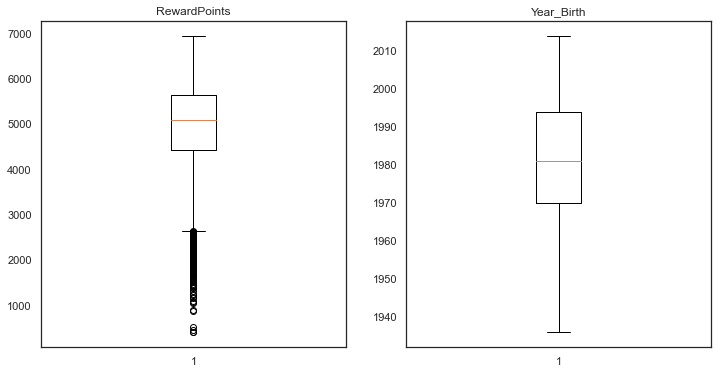

In [78]:
fig, axs = plt.subplots(1, 2, figsize = (12,6))

axs[0].boxplot(data = df, x = 'RewardPoints')
axs[0].set_title('RewardPoints')
axs[1].boxplot(data = df, x = 'Year_Birth')
axs[1].set_title('Year_Birth')

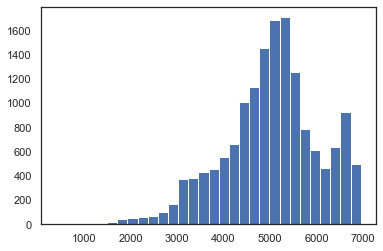

In [79]:
plt.hist(df.RewardPoints, bins = 30)
plt.show()

In [80]:
p1 = np.percentile(df.RewardPoints, 2.5)
RewardP = np.where( df.RewardPoints<p1, p1,  df.RewardPoints)

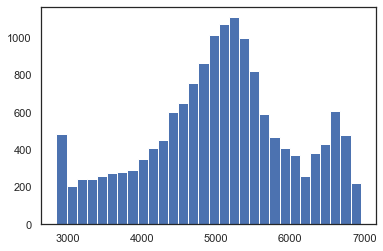

In [81]:
plt.hist(RewardP, bins = 30)
plt.show()

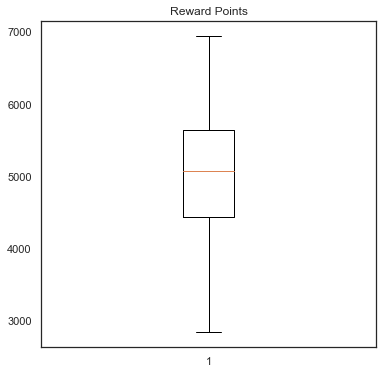

In [82]:
fig = plt.figure(figsize =(6, 6))
plt.boxplot(RewardP)
plt.title("Reward Points")
plt.show()

In [83]:
p1 = np.percentile(df.RewardPoints, 2.5)
RewardP2 = np.where(df.RewardPoints<p1, df.RewardPoints.median(),  df.RewardPoints)

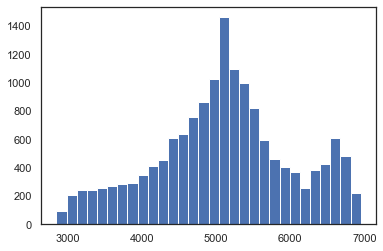

In [84]:
plt.hist(RewardP2, bins = 30)
plt.show()

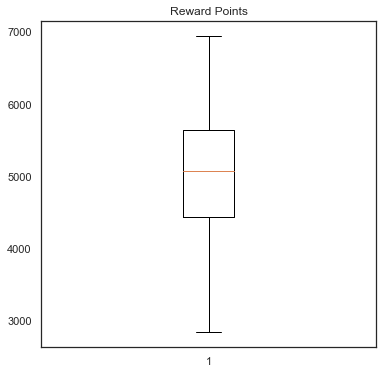

In [85]:
fig = plt.figure(figsize =(6, 6))
plt.boxplot(RewardP)
plt.title("Reward Points")
plt.show()

In [86]:
RP = pd.DataFrame(RewardP)
RP[1] = RewardP2
RP.skew()


0   -0.229961
1   -0.131391
dtype: float64

In [87]:
df['RewardPoints_'] = RP[0]
df.drop(columns=['RewardPoints'], inplace=True)

In [88]:
df.Churn.value_counts()

nochurn    8477
churn      7112
Name: Churn, dtype: int64

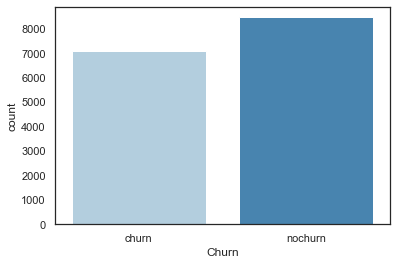

In [89]:
sns.countplot(x="Churn", data = df, palette = "Blues")
plt.show()

In [90]:
nochurn_count = len(df[df['Churn']=='nochurn'])
churn_count = len(df[df['Churn']=='churn'])
nochurn_perc = nochurn_count/len(df)
churn_perc = churn_count/len(df)
print("percentage of no churn is", nochurn_perc)
print("percentage of churn is", churn_perc)

percentage of no churn is 0.5437808711270767
percentage of churn is 0.4562191288729232


In [91]:
df.groupby('Churn').median()

,Year_Birth,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,RewardPoints_
Churn,,,,,,,,,,,,,,,,
churn,1985.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,5084.0
nochurn,1979.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5093.0


In [92]:
df['Gender'] = df['Name'].str.split('. ', expand = True)[0]

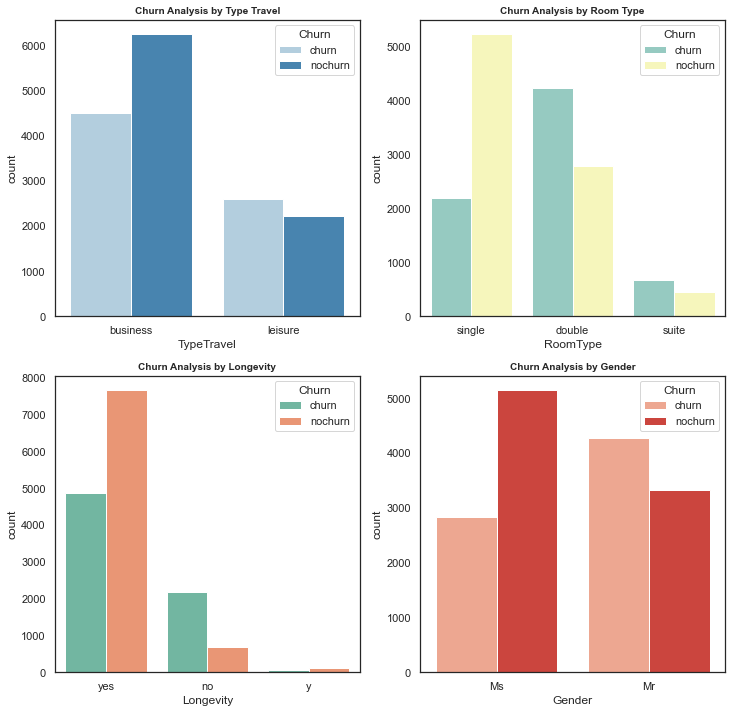

In [93]:
fig, ax =plt.subplots(2,2, figsize = (12,12))
sns.countplot(x="TypeTravel", data = df, hue = "Churn", palette = "Blues", ax=ax[0,0])
ax[0,0].set_title("Churn Analysis by Type Travel", fontsize=10, fontweight = "bold")


sns.countplot(x="RoomType", data = df, hue = "Churn", palette="Set3", ax=ax[0,1])
ax[0,1].set_title("Churn Analysis by Room Type", fontsize=10, fontweight = "bold")


sns.countplot(x="Longevity", data = df, hue = "Churn", palette="Set2", ax=ax[1,0])
ax[1,0].set_title("Churn Analysis by Longevity", fontsize=10, fontweight = "bold")

sns.countplot(x="Gender", data = df, hue = "Churn", palette="Reds", ax=ax[1,1])
ax[1,1].set_title("Churn Analysis by Gender", fontsize=10, fontweight = "bold")

fig.show()

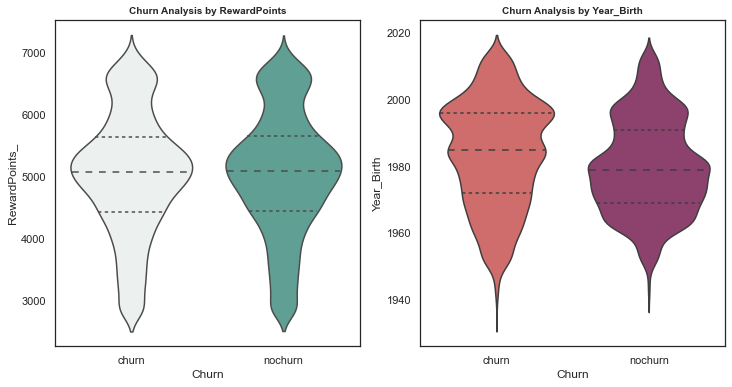

In [94]:
fig, ax =plt.subplots(1,2, figsize = (12,6))

sns.violinplot(data=df, x="Churn", y="RewardPoints_", palette= "light:#5A9",split=True, inner="quartile", ax=ax[0])
ax[0].set_title("Churn Analysis by RewardPoints", fontsize=10, fontweight = "bold")

sns.violinplot(data=df, x="Churn", y="Year_Birth", palette= "flare", split=True, inner="quartile", ax=ax[1])
ax[1].set_title("Churn Analysis by Year_Birth", fontsize=10, fontweight = "bold")

fig.show()

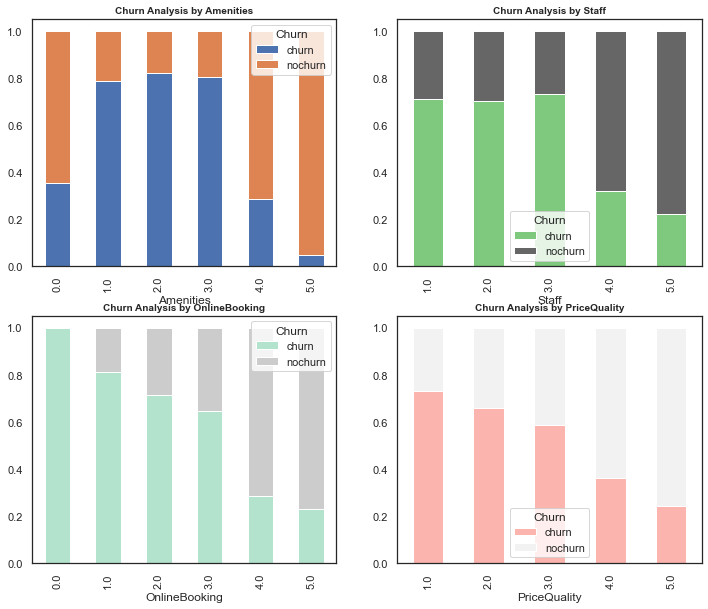

In [95]:
fig, ax =plt.subplots(2,2, figsize = (12,10))

table=pd.crosstab(df.Amenities,df.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax[0,0])
ax[0,0].set_title("Churn Analysis by Amenities", fontsize=10, fontweight = "bold")

table=pd.crosstab(df.Staff,df.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', colormap= 'Accent',stacked=True, ax=ax[0,1])
ax[0,1].set_title("Churn Analysis by Staff", fontsize=10, fontweight = "bold")

table=pd.crosstab(df.OnlineBooking,df.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', colormap='Pastel2', stacked=True, ax=ax[1,0])
ax[1,0].set_title("Churn Analysis by OnlineBooking", fontsize=10, fontweight = "bold")


table=pd.crosstab(df.PriceQuality,df.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', colormap='Pastel1', stacked=True, ax=ax[1,1])
ax[1,1].set_title("Churn Analysis by PriceQuality", fontsize=10, fontweight = "bold")


fig.show()

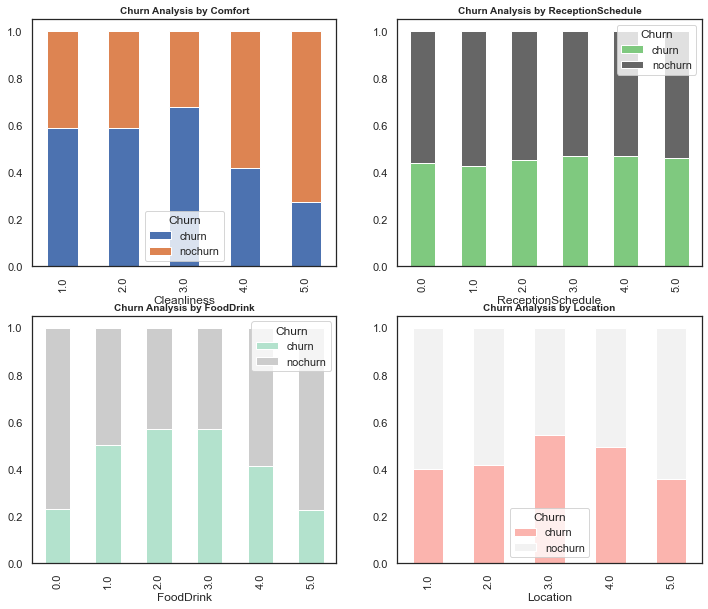

In [96]:
fig, ax =plt.subplots(2,2, figsize = (12,10))

table=pd.crosstab(df.Cleanliness,df.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax[0,0])
ax[0,0].set_title("Churn Analysis by Comfort", fontsize=10, fontweight = "bold")

table=pd.crosstab(df.ReceptionSchedule,df.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', colormap= 'Accent',stacked=True, ax=ax[0,1])
ax[0,1].set_title("Churn Analysis by ReceptionSchedule", fontsize=10, fontweight = "bold")

table=pd.crosstab(df.FoodDrink,df.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', colormap='Pastel2', stacked=True, ax=ax[1,0])
ax[1,0].set_title("Churn Analysis by FoodDrink", fontsize=10, fontweight = "bold")


table=pd.crosstab(df.Location,df.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', colormap='Pastel1', stacked=True, ax=ax[1,1])
ax[1,1].set_title("Churn Analysis by Location", fontsize=10, fontweight = "bold")


fig.show()

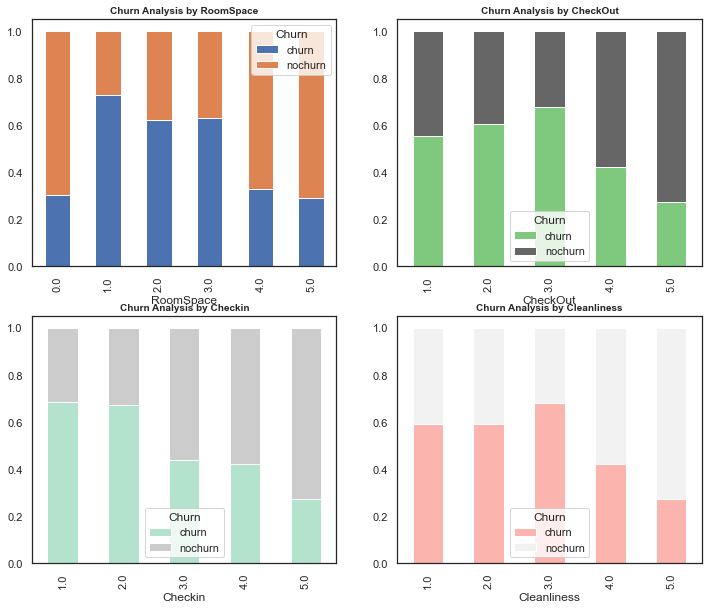

In [97]:
fig, ax =plt.subplots(2,2, figsize = (12,10))

table=pd.crosstab(df.RoomSpace,df.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax[0,0])
ax[0,0].set_title("Churn Analysis by RoomSpace", fontsize=10, fontweight = "bold")

table=pd.crosstab(df.CheckOut,df.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', colormap= 'Accent',stacked=True, ax=ax[0,1])
ax[0,1].set_title("Churn Analysis by CheckOut", fontsize=10, fontweight = "bold")

table=pd.crosstab(df.Checkin,df.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', colormap='Pastel2', stacked=True, ax=ax[1,0])
ax[1,0].set_title("Churn Analysis by Checkin", fontsize=10, fontweight = "bold")


table=pd.crosstab(df.Cleanliness,df.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', colormap='Pastel1', stacked=True, ax=ax[1,1])
ax[1,1].set_title("Churn Analysis by Cleanliness", fontsize=10, fontweight = "bold")


fig.show()

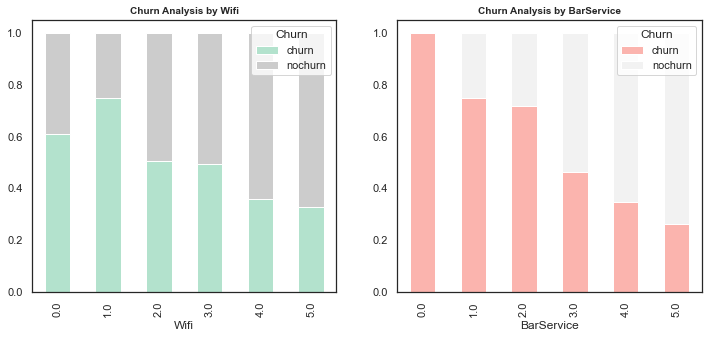

In [98]:
fig, ax =plt.subplots(1,2, figsize = (12,5))


table=pd.crosstab(df.Wifi,df.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', colormap='Pastel2', stacked=True, ax=ax[0])
ax[0].set_title("Churn Analysis by Wifi", fontsize=10, fontweight = "bold")


table=pd.crosstab(df.BarService,df.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', colormap='Pastel1', stacked=True, ax=ax[1])
ax[1].set_title("Churn Analysis by BarService", fontsize=10, fontweight = "bold")


fig.show()

In [99]:
df['TypeTravel'].replace({'leisure':1, 'business':0}, inplace=True)

In [100]:
df.Longevity.replace({"y": 1, "yes": 1, "no": 0}, inplace = True)

In [101]:
df.Churn.replace({"nochurn": 0, "churn": 1}, inplace = True)

In [102]:
df['Gender'].replace({'Ms':1, 'Mr':0}, inplace=True)

In [103]:
df.drop(columns=['Name'], inplace=True)

In [104]:
df.columns

Index(['Churn', 'Longevity', 'TypeTravel', 'RoomType', 'Year_Birth', 'Comfort',
       'ReceptionSchedule', 'FoodDrink', 'Location', 'Wifi', 'Amenities',
       'Staff', 'OnlineBooking', 'PriceQuality', 'RoomSpace', 'CheckOut',
       'Checkin', 'Cleanliness', 'BarService', 'RewardPoints_', 'Gender'],
      dtype='object')

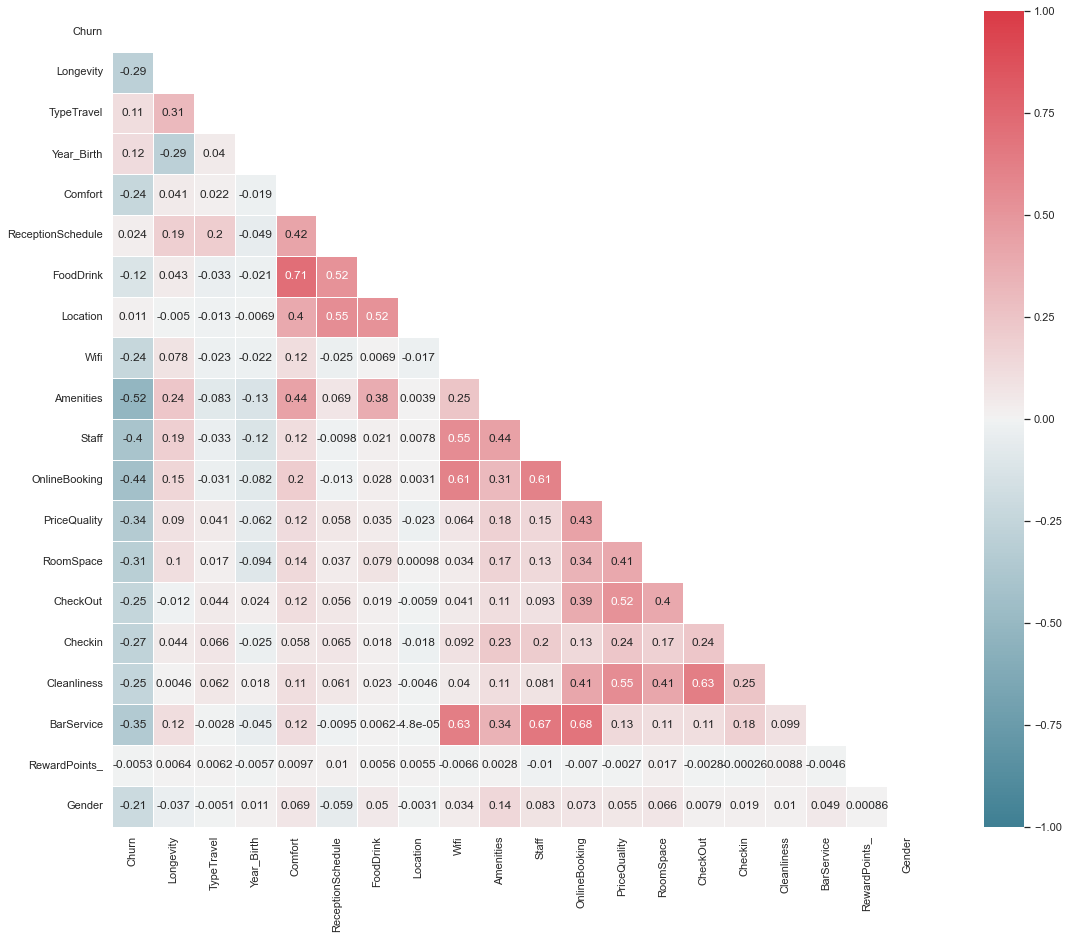

In [105]:
sns.set(style="white")
corr = df.corr(method= "pearson") 
fig, ax = plt.subplots(figsize=(20, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(corr, dtype=np.bool) #Return an array of zeros (Falses) with the same shape and type as a given array
mask[np.triu_indices_from(mask)] = True 
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True,annot=True, linewidths=.5,vmin = -1, vmax = 1, ax=ax)

plt.show()  

**Notes:**
- `Churn` is most correlated with `Amenities`, `OnlineBooking`, `Staff`, `BarService`, `PriceQuality`, `RoomSpace`, `RoomType`, `Longevity`

In [106]:
indep_variables = df.drop(columns = "Churn")

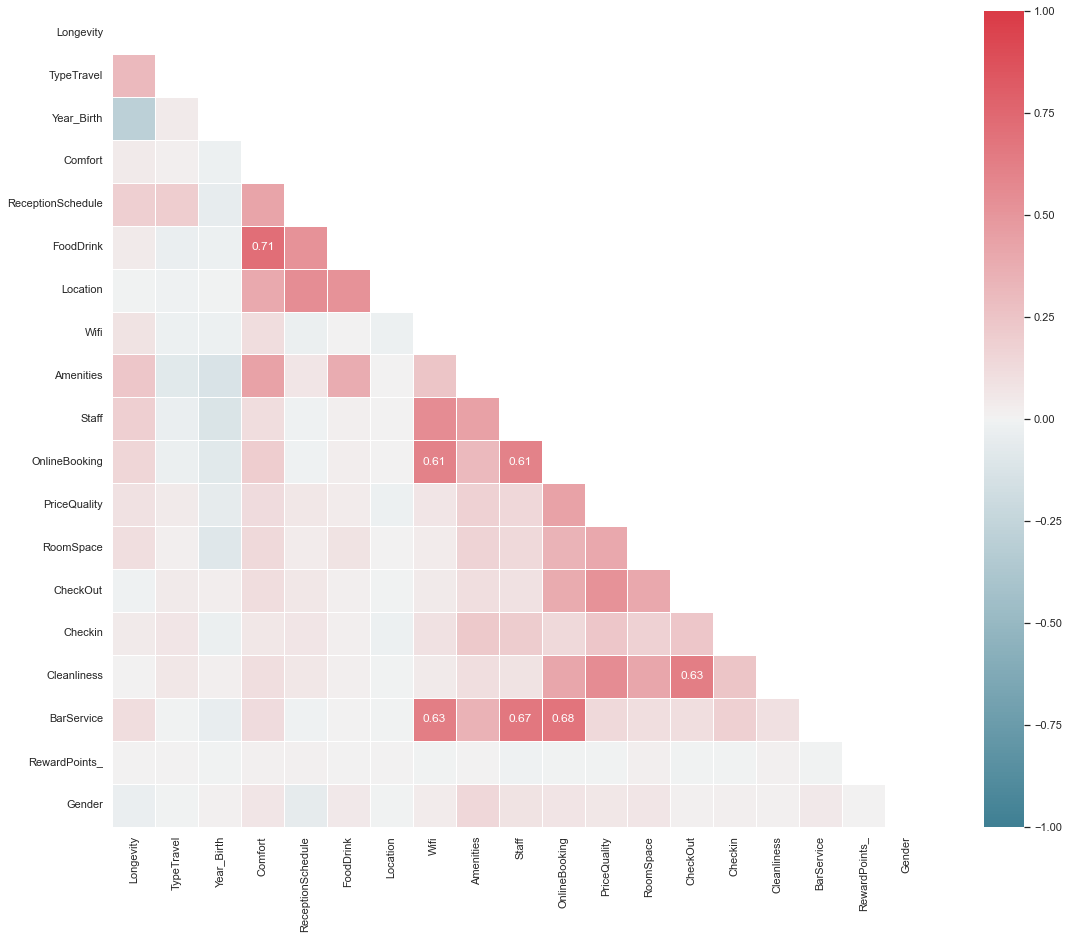

In [107]:
sns.set(style="white")
corr = indep_variables.corr(method= "pearson") 
fig, ax = plt.subplots(figsize=(20, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(corr, dtype=np.bool) #Return an array of zeros (Falses) with the same shape and type as a given array
mask[np.triu_indices_from(mask)] = True 
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True,annot=True, linewidths=.5,vmin = -1, vmax = 1, ax=ax)


for t in ax.texts:
    if float(t.get_text())>=0.6 or float(t.get_text())<-0.6:
        t.set_text(t.get_text()) #if the value is greater than 0.4 then I set the text 
    else:
        t.set_text("") # if not it sets an empty text



plt.show()      

**Notes:**
- Keep `Amenities`, `OnlineBooking`, `Staff`, `PriceQuality`, `RoomSpace`, `RoomType`, `Longevity`

In [369]:
X = df.drop(columns=['Churn', 'RewardPoints_'], axis=1)
y = df['Churn']

KeyError: "['Churn' 'RewardPoints_'] not found in axis"

In [114]:
X.isnull().sum()

Longevity            0
TypeTravel           0
RoomType             0
Year_Birth           0
Comfort              0
ReceptionSchedule    0
FoodDrink            0
Location             0
Wifi                 0
Amenities            0
Staff                0
OnlineBooking        0
PriceQuality         0
RoomSpace            0
CheckOut             0
Checkin              0
Cleanliness          0
BarService           0
Gender               0
dtype: int64

In [115]:
num_vars = ['Year_Birth', 'Comfort','ReceptionSchedule', 'FoodDrink', 'Location', 'Wifi', 'Amenities','Staff', 'OnlineBooking', 'PriceQuality', 'RoomSpace', 'CheckOut', 'Checkin', 'Cleanliness', 'BarService']
cat_vars = ['TypeTravel', 'Gender',  'RoomType', 'Longevity']

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LassoCV
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import f_classif

In [143]:
def select_best_features(X, y, splits=7):
    sel_log = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    sel_tree = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    sel_forest = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    sel_lasso = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    sel_svc = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    sel_gb = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    sel_gauss = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    skf = StratifiedKFold(n_splits =  splits)
    counter = 0
    for train_index, val_index in skf.split(X, y):
        counter +=1
        print('')
        print('--------------------------------------------------------')
        print('SPLIT ', counter)
        print('--------------------------------------------------------')
        print('')
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        # get all numerical variables
        X_train_num = X_train[num_vars]
        X_val_num = X_val[num_vars]
        
        # get all categorical variables
        X_train_cat = X_train[cat_vars]
        X_val_cat = X_val[cat_vars]
        
        # fill missing values (KNN Imputer for Year of Birth: first variable of numerical variables)
        k_imputer = round(np.sqrt(len(X_train_num)),0).astype('int32') # 125
        imputer = KNNImputer(n_neighbors=k_imputer, weights="uniform", metric='nan_euclidean')
        imputer.fit(X_train_num)
        data_KNN_train = imputer.transform(X_train_num)
        data_KNN_train = pd.DataFrame(data_KNN_train)
        data_KNN_train[0] = data_KNN_train[0].round(0)
        X_train_num['Year_Birth'] = data_KNN_train[0].values
        # Use Train Imputer for Validation Data
        data_KNN_val = imputer.transform(X_val_num)
        data_KNN_val = pd.DataFrame(data_KNN_val)
        data_KNN_val[0] = data_KNN_val[0].round(0)
        X_val_num['Year_Birth'] = data_KNN_val[0].values
        
        # Apply scaling to numerical data
        scaler = MinMaxScaler().fit(X_train_num)
        X_train_scaled = pd.DataFrame(scaler.transform(X_train_num), columns = X_train_num.columns, index = X_train_num.index,) # MinMaxScaler in the training data
        X_val_scaled = pd.DataFrame(scaler.transform(X_val_num), columns = X_val_num.columns, index = X_val_num.index,) # MinMaxScaler in the validation data
        
        # Converting every column that is int64 to int8 for performance issues
        X_train_scaled.iloc[:,(X_train_scaled.dtypes=='int64').values] = \
        X_train_scaled.iloc[:,(X_train_scaled.dtypes=='int64').values].astype(np.int8)
        
        X_val_scaled.iloc[:,(X_val_scaled.dtypes=='int64').values] = \
        X_val_scaled.iloc[:,(X_val_scaled.dtypes=='int64').values].astype(np.int8)
        
        # Check which features to use using RFE and logistic regression
        model = LogisticRegression()
        rfe = RFE(estimator = model, n_features_to_select = 6)
        X_rfe = rfe.fit_transform(X = X_train_scaled, y = y_train)
        selected_features = pd.Series(rfe.support_, index = X_train_scaled.columns)
        sel_log=np.add(sel_log,list(map(int, selected_features)))
        
        # Check which features to use using RFE and decision tree
        model = DecisionTreeClassifier()
        rfe = RFE(estimator = model, n_features_to_select = 6)
        X_rfe = rfe.fit_transform(X = X_train_scaled, y = y_train)
        selected_features = pd.Series(rfe.support_, index = X_train_scaled.columns)
        sel_tree=np.add(sel_tree,list(map(int, selected_features)))
        
        # Check which features to use using RFE and random forest
        model = RandomForestClassifier()
        rfe = RFE(estimator = model, n_features_to_select = 6)
        X_rfe = rfe.fit_transform(X = X_train_scaled, y = y_train)
        selected_features = pd.Series(rfe.support_, index = X_train_scaled.columns)
        sel_forest=np.add(sel_forest,list(map(int, selected_features)))
        
        # Check which features to use using RFE and SVC
        model = SVC(kernel="linear")
        rfe = RFE(estimator = model, n_features_to_select = 6)
        X_rfe = rfe.fit_transform(X = X_train_scaled, y = y_train)
        selected_features = pd.Series(rfe.support_, index = X_train_scaled.columns)
        sel_svc=np.add(sel_svc,list(map(int, selected_features)))
        
        # Check which features to use using RFE and GB
        model = GradientBoostingClassifier()
        rfe = RFE(estimator = model, n_features_to_select = 6)
        X_rfe = rfe.fit_transform(X = X_train_scaled, y = y_train)
        selected_features = pd.Series(rfe.support_, index = X_train_scaled.columns)
        sel_gb=np.add(sel_gb,list(map(int, selected_features)))
        
        #Lasso
        reg = LassoCV()
        reg.fit(X=X_train_scaled, y=y_train.replace('nochurn',0).replace('churn',1))
        print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
        print("Best score using built-in LassoCV: %f" %reg.score(X = X_train_scaled,y = y_train.replace('nochurn',0).replace('churn',1)))
        coef = pd.Series(reg.coef_, index = X_train_scaled.columns)
        sel_lasso=np.add(sel_lasso,coef.values)
        
        # Check which features to use using Chi-Square
        print('')
        print('----------------- CHI-SQUARE ----------------------')
        def TestIndependence(X,y,var,alpha=0.05):        
            dfObserved = pd.crosstab(y,X) 
            chi2, p, dof, expected = chi2_contingency(dfObserved.values)
            dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
            if p<alpha:
                result="{0} is IMPORTANT for Prediction".format(var)
            else:
                result="{0} is NOT important for Prediction. (Discard {0} from model)".format(var)
            print(result)
                 
        
        for var in X_train_cat:
            TestIndependence(X_train_cat[var],y_train, var)
    
    sel_lasso = sel_lasso/splits

            
    final = pd.DataFrame(np.array([sel_log,sel_tree,sel_forest,sel_lasso,sel_svc,sel_gb]),\
                         columns=num_vars,index=['Logistic Regression','Decision Tree',\
                                                'Random Forest','Lasso','SVC','GB'])
            
    print(final.T)
    
    

In [144]:
select_best_features(X, y)


--------------------------------------------------------
SPLIT  1
--------------------------------------------------------

Best alpha using built-in LassoCV: 0.000161
Best score using built-in LassoCV: 0.410206

----------------- CHI-SQUARE ----------------------
TypeTravel is IMPORTANT for Prediction
Gender is IMPORTANT for Prediction
RoomType is IMPORTANT for Prediction
Longevity is IMPORTANT for Prediction

--------------------------------------------------------
SPLIT  2
--------------------------------------------------------

Best alpha using built-in LassoCV: 0.000115
Best score using built-in LassoCV: 0.410540

----------------- CHI-SQUARE ----------------------
TypeTravel is IMPORTANT for Prediction
Gender is IMPORTANT for Prediction
RoomType is IMPORTANT for Prediction
Longevity is IMPORTANT for Prediction

--------------------------------------------------------
SPLIT  3
--------------------------------------------------------

Best alpha using built-in LassoCV: 0.000172
B

In [147]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [150]:
data = pd.get_dummies(X, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=True, dtype=None)

In [154]:
# Build RF classifier to use in feature selection
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

# Build step forward feature selection
sfs1 = sfs(clf,
           k_features=6,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=7)

# Perform SFFS
sfs1 = sfs1.fit(data, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   28.3s finished

[2022-06-16 18:12:46] Features: 1/6 -- score: 0.8060170633138751[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   28.9s finished

[2022-06-16 18:13:15] Features: 2/6 -- score: 0.8457886971582526[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   29.3s finished

[2022-06-16 18:13:44] Features: 3/6 -- score: 0.8908204503175315[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [208]:
fow_feature = pd.DataFrame.from_dict(sfs1.get_metric_dict())
fow_feature.iloc[4][6]

AttributeError: SequentialFeatureSelector has not been fitted, yet.

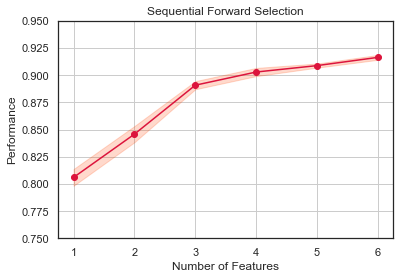

In [157]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev', color="crimson", bcolor="orangered")

plt.ylim([0.75, 0.95])
plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

In [162]:
# Build RF classifier to use in feature selection - Backward 
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

# Build step forward feature selection
sbs1 = sfs(clf,
           k_features=10,
           forward=False,
           floating=False,
           verbose=2,
           scoring='f1',
           cv=7)

# Perform SFFS
sbs1 = sbs1.fit(data, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.2min finished

[2022-06-16 18:20:13] Features: 19/10 -- score: 0.9359212226445398[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:  1.3min finished

[2022-06-16 18:21:32] Features: 18/10 -- score: 0.9370439157547609[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  1.2min finished

[2022-06-16 18:22:46] Features: 17/10 -- score: 0.9377574760660171[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

In [204]:
fow_feature2 = pd.DataFrame.from_dict(sbs1.get_metric_dict())
fow_feature2.iloc[3][10]

('Longevity',
 'TypeTravel',
 'Comfort',
 'ReceptionSchedule',
 'Location',
 'OnlineBooking',
 'CheckOut',
 'Checkin',
 'Gender',
 'RoomType_single')

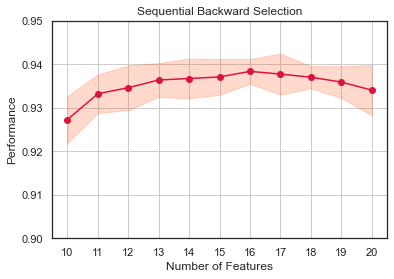

In [165]:

fig2 = plot_sfs(sbs1.get_metric_dict(), kind='std_dev', color="crimson", bcolor="orangered")

plt.ylim([0.90, 0.95])
plt.title('Sequential Backward Selection')
plt.grid()
plt.show()

In [212]:
# Build RF classifier to use in feature selection - Backward 
knn = KNeighborsClassifier(n_neighbors=4)

# Build step forward feature selection
sbs2 = sfs(knn,
           k_features=6,
           forward=False,
           floating=False,
           verbose=2,
           scoring='f1',
           cv=7)

# Perform SFFS
sbs2 = sbs2.fit(data, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   40.8s finished

[2022-06-16 18:52:37] Features: 19/6 -- score: 0.8902882314463945[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   42.9s finished

[2022-06-16 18:53:20] Features: 18/6 -- score: 0.8932940145610118[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   43.6s finished

[2022-06-16 18:54:04] Features: 17/6 -- score: 0.8959123435528814[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [272]:
fow_feature3 = pd.DataFrame.from_dict(sbs2.get_metric_dict())
fow_feature3.iloc[3][10]

('Longevity',
 'TypeTravel',
 'Comfort',
 'Location',
 'Amenities',
 'OnlineBooking',
 'CheckOut',
 'Cleanliness',
 'Gender',
 'RoomType_single')

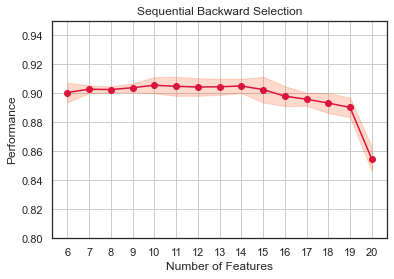

In [214]:

fig3 = plot_sfs(sbs2.get_metric_dict(), kind='std_dev', color="crimson", bcolor="orangered")

plt.ylim([0.80, 0.95])
plt.title('Sequential Backward Selection')
plt.grid()
plt.show()

In [273]:
best_vars_v1 = ['Longevity',
 'TypeTravel',
 'Comfort',
 'Location',
 'Amenities',
 'OnlineBooking',
 'Gender',
 'RoomType']
# select the final features 
X_sel_v1 = X[best_vars_v1].copy()

#best_vars_v2 = ['Amenities', 'OnlineBooking', 'Staff', 'BarService', 'PriceQuality', 'RoomSpace', 'RoomType', 'Longevity']
#X_sel_v2 = X[best_vars_v2].copy()


best_vars_v3 = ['Longevity',
 'TypeTravel',
 'Comfort',
 'Location',
 'Amenities',
 'OnlineBooking',
 'CheckOut',
 'Cleanliness',
 'Gender',
 'RoomType']
# select the final features 
X_sel_v3 = X[best_vars_v3].copy()


In [379]:
def compare_models(X, y, model):
    # apply StratifiedK-Fold
    skf = StratifiedKFold(n_splits = 5)
    score_train = []
    score_val = []
    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        
        # Create dummies and remove one of the variables (to avoid multicollinearity)
        X_train_dummies = pd.get_dummies(X_train, columns=['Longevity','TypeTravel','RoomType','Gender'], drop_first=True)
        X_val_dummies = pd.get_dummies(X_val, columns=['Longevity','TypeTravel','RoomType','Gender'], drop_first=True)
        
        #print(X_train_dummies)
        # This time we are going to use validation to check overfitting 
        # so we need also to make all the needed changes in the validation
        
        # fill missing values (KNN Imputer for Year of Birth: first variable of numerical variables)
        """k_imputer = round(np.sqrt(len(X_train_dummies)),0).astype('int32') # 125
        imputer = KNNImputer(n_neighbors=k_imputer, weights="uniform", metric='nan_euclidean')
        imputer.fit(X_train_dummies)
        data_KNN_train = imputer.transform(X_train_dummies)
        data_KNN_train = pd.DataFrame(data_KNN_train)
        data_KNN_train[0] = data_KNN_train[0].round(0)
        X_train_dummies['Age'] = data_KNN_train[0].values"""
        #age_mode = X_train_dummies['Age'].mode()[0]
        #X_train_dummies['Age'].fillna(age_mode, inplace = True)
        # Use Train Imputer for Validation Data
        """data_KNN_val = imputer.transform(X_val_dummies)
        data_KNN_val = pd.DataFrame(data_KNN_val)
        data_KNN_val[0] = data_KNN_val[0].round(0)
        X_val_dummies['Age'] = data_KNN_val[0].values"""
        #X_val_dummies['Age'].fillna(age_mode, inplace = True)
         
        # If we don't have all the values in the validation dataset that we have in the train, that column will not be created
        # We should assure that all columns in train are also present in validation
        # Get missing columns from the training dataset
        missing_cols = set(X_train_dummies.columns ) - set(X_val_dummies.columns )
        # Add a missing column in test set with default value equal to 0
        for c in missing_cols:
            X_val_dummies[c] = 0
        # Ensure the order of column in the test set is in the same order than in train set
        X_val_dummies = X_val_dummies[X_train_dummies.columns]
        
        # Data Scaling
        # Apply MinMaxScaler
        scaler = MinMaxScaler().fit(X_train_dummies)
        X_train_scaled = scaler.transform(X_train_dummies) 
        X_val_scaled = scaler.transform(X_val_dummies) # Scaling with 'scaler' from train data

        # Apply model
        model.fit(X_train_scaled, y_train)
        predictions_train = model.predict(X_train_scaled)
        predictions_val = model.predict(X_val_scaled)
        score_train.append(f1_score(y_train, predictions_train))
        score_val.append(f1_score(y_val, predictions_val))

    avg_train = round(np.mean(score_train),3)
    avg_val = round(np.mean(score_val),3)
    std_train = round(np.std(score_train),2)
    std_val = round(np.std(score_val),2)

    return str(avg_train) + '+/-' + str(std_train),str(avg_val) + '+/-' + str(std_val)

In [380]:
def show_results(df, X, y, *args):
    """
    Receive an empty dataframe and the different models and call the function avg_score
    """
    count = 0
    # for each model passed as argument
    for arg in args:
        # obtain the results provided by avg_score
        avg_train, avg_test = compare_models(X, y, arg)
        # store the results in the right row
        df.iloc[count] = avg_train, avg_test
        count+=1
    
    return df

In [334]:
model_LR = LogisticRegression()
model_KNN = KNeighborsClassifier()
model_DTC = DecisionTreeClassifier(max_depth = 10)
model_DTC_ent = DecisionTreeClassifier(criterion = 'entropy', max_depth=10)
model_RFE = RandomForestClassifier()


df = pd.DataFrame(columns = ['Train','Validation'], index = ['Logistic Regression','KNN', 'DTC', 'DTC_ent', 'RFE'])
show_results(df, X_sel_v3, y, model_LR, model_KNN, model_DTC, model_DTC_ent, model_RFE)

,Train,Validation
Logistic Regression,0.799+/-0.0,0.799+/-0.01
KNN,0.928+/-0.0,0.903+/-0.0
DTC,0.932+/-0.0,0.915+/-0.0
DTC_ent,0.93+/-0.0,0.916+/-0.0
RFE,0.977+/-0.0,0.925+/-0.0


In [230]:
print(model_DTC.tree_.max_depth)

19


In [402]:
data_sel = X[['Longevity', 'TypeTravel', 'Comfort',
 'Location',
 'Amenities',
 'OnlineBooking',
 'CheckOut',
 'Cleanliness',
 'Gender',
 'RoomType']].copy()

# Create dummies and remove one of the variables (to avoid multicollinearity)
data_final_dummies = pd.get_dummies(data_sel, columns=['Longevity', 'TypeTravel', 'Gender', 'RoomType'], drop_first=True)

# Data Scaling
# Apply MinMaxScaler
scaler = MinMaxScaler().fit(data_final_dummies)
data_final_scaled = scaler.transform(data_final_dummies)
pd.DataFrame(data_final_scaled).iloc[:,(pd.DataFrame(data_final_scaled).dtypes=='int64').values] = \
pd.DataFrame(data_final_scaled).iloc[:,(pd.DataFrame(data_final_scaled).dtypes=='int64').values].astype(np.int8)

In [290]:
from sklearn.model_selection import GridSearchCV

In [291]:
parameter_space = {
    'criterion': ['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'min_samples_split':[2,3,4,5],
    'min_samples_leaf':[1,2,3],
    'max_features': ['auto','sqrt','log2'],
}

In [309]:
model = DecisionTreeClassifier()

In [310]:
clf_dt = GridSearchCV(model, parameter_space)

In [294]:
clf_dt.fit(data_final_scaled, y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']})

In [296]:
clf_dt.best_params_

{'criterion': 'gini',
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'splitter': 'best'}

In [301]:
model_DTC_grid = DecisionTreeClassifier(criterion='gini', max_features='log2', min_samples_leaf=1, min_samples_split=5, splitter = 'best')
df = pd.DataFrame(columns = ['Train','Validation'], index = ['DTC'])
show_results(df, X_sel_v3, y, model_DTC_grid)

,Train,Validation
DTC,0.954+/-0.0,0.903+/-0.01


In [406]:
data_sel2 = X[['Longevity',
 'TypeTravel',
 'Comfort',
 'Location',
 'Amenities',
 'OnlineBooking',
 'Gender',
 'RoomType']].copy()

# Create dummies and remove one of the variables (to avoid multicollinearity)
data_final_dummies2 = pd.get_dummies(data_sel2, columns=['Longevity', 'TypeTravel', 'Gender', 'RoomType'], drop_first=True)

# Data Scaling
# Apply MinMaxScaler
scaler = MinMaxScaler().fit(data_final_dummies2)
data_final_scaled2 = scaler.transform(data_final_dummies2)
pd.DataFrame(data_final_scaled2).iloc[:,(pd.DataFrame(data_final_scaled2).dtypes=='int64').values] = \
pd.DataFrame(data_final_scaled2).iloc[:,(pd.DataFrame(data_final_scaled2).dtypes=='int64').values].astype(np.int8)

In [315]:
clf_dt.fit(data_final_scaled2, y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']})

In [316]:
clf_dt.best_params_

{'criterion': 'entropy',
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [317]:
model_DTC_grid = DecisionTreeClassifier(criterion='entropy', max_features='log2', min_samples_leaf=1, min_samples_split=2, splitter = 'best')
df = pd.DataFrame(columns = ['Train','Validation'], index = ['DTC'])
show_results(df, X_sel_v1, y, model_DTC_grid)

,Train,Validation
DTC,0.948+/-0.0,0.911+/-0.0


In [400]:
parameter_space = {
    'n_estimators': [50,100,200,300],
    'criterion': ['gini','entropy','log_loss'],
    'min_samples_split':[2,3,4,5],
    'min_samples_leaf':[1,2,3],
    'max_features': [None,'sqrt','log2'],
}

In [414]:
model = RandomForestClassifier()

In [415]:
clf_rf = GridSearchCV(model, parameter_space)

In [416]:
clf_rf.fit(pd.DataFrame(data_final_scaled2), y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [50, 100, 200, 300]})

In [417]:
clf_rf.best_params_

{'criterion': 'gini',
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 50}

In [418]:
model_LR = LogisticRegression()
model_KNN = KNeighborsClassifier()
model_DT = DecisionTreeClassifier(criterion= 'entropy',max_features= 'sqrt',min_samples_leaf= 1, min_samples_split= 4, splitter= 'best')
#model_RF =  RandomForestClassifier(criterion='gini',max_features='log2',min_samples_leaf=2, min_samples_split=2,n_estimators=100)
model_RF =  RandomForestClassifier(criterion='gini',max_features='sqrt',min_samples_leaf=2, min_samples_split=5,n_estimators=50)

model_SVC = SVC(kernel="linear")
model_GB = GradientBoostingClassifier(learning_rate=0.12, loss='deviance',max_depth=4,max_features='auto', min_samples_leaf=1,n_estimators=750,subsample=1)
model_NN = MLPClassifier(hidden_layer_sizes=(75, 75), activation = 'logistic', solver = 'adam', learning_rate_init = 0.01)

In [419]:
data_sel = X[['Longevity',
 'TypeTravel',
 'Comfort',
 'Location',
 'Amenities',
 'OnlineBooking',
 'Gender',
 'RoomType']].copy()


df = pd.DataFrame(columns = ['Train','Validation'], index =['Logistic Regression','KNN','Decision Tree','Random Forest','SVC', 'GB','NN'])
show_results(df, data_sel, y, model_LR, model_KNN, model_DT, model_RF, model_SVC, model_GB, model_NN)

,Train,Validation
Logistic Regression,0.79+/-0.0,0.79+/-0.01
KNN,0.926+/-0.0,0.907+/-0.0
Decision Tree,0.943+/-0.0,0.911+/-0.01
Random Forest,0.94+/-0.0,0.922+/-0.0
SVC,0.796+/-0.0,0.794+/-0.01
GB,0.943+/-0.0,0.928+/-0.0
NN,0.935+/-0.0,0.926+/-0.01


In [420]:
X_final = X[['Longevity',
 'TypeTravel',
 'Comfort',
 'Location',
 'Amenities',
 'OnlineBooking',
 'Gender',
 'RoomType']].copy()

y_final = y.copy()

       
# Create dummies and remove one of the variables (to avoid multicollinearity)
X_final_dummies = pd.get_dummies(X_final, columns=['Longevity','TypeTravel','RoomType','Gender'], drop_first=True)


# Data Scaling
# Apply MinMaxScaler
scaler = MinMaxScaler().fit(X_final_dummies)
X_final_scaled = scaler.transform(X_final_dummies) 




# Create your final model with exactly the same parameters than your best model during model comparison
final_model =  RandomForestClassifier(criterion='gini',max_features='log2',min_samples_leaf=2, min_samples_split=2,n_estimators=100).fit(X_final_scaled, y_final)

In [394]:
test = pd.read_csv('dataset/test.csv')

test['Gender'] = test['Name'].str.split('. ', expand = True)[0]

test_final = test[['Longevity',
 'TypeTravel',
 'Comfort',
 'Location',
 'Amenities',
 'OnlineBooking',
 'Gender',
 'RoomType']]


# Create dummies and remove one of the variables (to avoid multicollinearity)
test_final_dummies = pd.get_dummies(test_final, columns=['Longevity','TypeTravel','RoomType','Gender'], drop_first=True)

# Data Scaling
# Apply MinMaxScaler
scaler = MinMaxScaler().fit(test_final_dummies)
X_final_scaled = scaler.transform(test_final_dummies) 


# Data Scaling
# Apply exactly the same MinMaxScaler used before
test_final_scaled = scaler.transform(test_final_dummies)


In [395]:
# Get predictions
predictions = final_model.predict(test_final_scaled)

In [396]:
#cust_index = test.index.T
cust_index = test.Cust_ID.T
#cust_index

In [397]:
answer = pd.DataFrame([cust_index, predictions]).T
answer
answer.columns = ['Cust_ID','Churn']
#answer

In [398]:
answer.to_csv('churn_subm6.csv', index = None)

In [408]:
X_final = X[['Longevity',
 'TypeTravel',
 'Comfort',
 'Location',
 'Amenities',
 'OnlineBooking',
 'Gender',
 'RoomType']].copy()

y_final = y.copy()

       
# Create dummies and remove one of the variables (to avoid multicollinearity)
X_final_dummies = pd.get_dummies(X_final, columns=['Longevity','TypeTravel','RoomType','Gender'], drop_first=True)


# Data Scaling
# Apply MinMaxScaler
scaler = MinMaxScaler().fit(X_final_dummies)
X_final_scaled = scaler.transform(X_final_dummies) 




# Create your final model with exactly the same parameters than your best model during model comparison
final_model =  GradientBoostingClassifier(learning_rate=0.12, loss='deviance',max_depth=4,max_features='auto', min_samples_leaf=1,n_estimators=750,subsample=1).fit(X_final_scaled, y_final)

In [409]:
test = pd.read_csv('dataset/test.csv')

test['Gender'] = test['Name'].str.split('. ', expand = True)[0]

test_final = test[['Longevity',
 'TypeTravel',
 'Comfort',
 'Location',
 'Amenities',
 'OnlineBooking',
 'Gender',
 'RoomType']]


# Create dummies and remove one of the variables (to avoid multicollinearity)
test_final_dummies = pd.get_dummies(test_final, columns=['Longevity','TypeTravel','RoomType','Gender'], drop_first=True)

# Data Scaling
# Apply MinMaxScaler
scaler = MinMaxScaler().fit(test_final_dummies)
X_final_scaled = scaler.transform(test_final_dummies) 


# Data Scaling
# Apply exactly the same MinMaxScaler used before
test_final_scaled = scaler.transform(test_final_dummies)


In [410]:
# Get predictions
predictions = final_model.predict(test_final_scaled)

In [411]:
#cust_index = test.index.T
cust_index = test.Cust_ID.T
#cust_index

In [412]:
answer = pd.DataFrame([cust_index, predictions]).T
answer
answer.columns = ['Cust_ID','Churn']
#answer

In [413]:
answer.to_csv('churn_subm7.csv', index = None)

In [428]:
X_final = X[['Longevity',
 'TypeTravel',
 'Comfort',
 'Location',
 'Amenities',
 'OnlineBooking',
 'Gender',
 'RoomType']].copy()

y_final = y.copy()

       
# Create dummies and remove one of the variables (to avoid multicollinearity)
X_final_dummies = pd.get_dummies(X_final, columns=['Longevity','TypeTravel','RoomType','Gender'], drop_first=True)


# Data Scaling
# Apply MinMaxScaler
scaler = MinMaxScaler().fit(X_final_dummies)
X_final_scaled = scaler.transform(X_final_dummies) 




# Create your final model with exactly the same parameters than your best model during model comparison
final_model =  MLPClassifier(hidden_layer_sizes=(75, 75), activation = 'logistic', solver = 'adam', learning_rate_init = 0.01).fit(X_final_scaled, y_final)

In [429]:
test = pd.read_csv('dataset/test.csv')

test['Gender'] = test['Name'].str.split('. ', expand = True)[0]

test_final = test[['Longevity',
 'TypeTravel',
 'Comfort',
 'Location',
 'Amenities',
 'OnlineBooking',
 'Gender',
 'RoomType']]


# Create dummies and remove one of the variables (to avoid multicollinearity)
test_final_dummies = pd.get_dummies(test_final, columns=['Longevity','TypeTravel','RoomType','Gender'], drop_first=True)

# Data Scaling
# Apply MinMaxScaler
scaler = MinMaxScaler().fit(test_final_dummies)
X_final_scaled = scaler.transform(test_final_dummies) 


# Data Scaling
# Apply exactly the same MinMaxScaler used before
test_final_scaled = scaler.transform(test_final_dummies)


In [430]:
# Get predictions
predictions = final_model.predict(test_final_scaled)

In [431]:
#cust_index = test.index.T
cust_index = test.Cust_ID.T
#cust_index

In [432]:
answer = pd.DataFrame([cust_index, predictions]).T
answer
answer.columns = ['Cust_ID','Churn']
#answer

In [433]:
answer.to_csv('churn_subm8.csv', index = None)